Let's say someone is in First or Second year and determining how much they should study for a good cgpa or not getting backlog or moreover to get placed. One aspect can be if any individual is havn't done any inernship then should they require internship or not.

kaggle dataset [link](https://www.kaggle.com/tejashvi14/engineering-placements-prediction)


## Details about dataset

**Age**: 
```Age At The Time Of Final Year```


**Gender**: 
```Gender Of Candidate, Male or Female```

**Stream**
```Engineering Stream That The Candidate Belongs To```

```Computer Science, Information Technology, Mechanical,Electronics And Communication, Electrical, Civil```


**CGPA**:
```CGPA Till 6th Semester, Average of 6 sem's cgpa, min 0 and max 10```

**Hostel**
```Whether Student Lives In College Accomodation, 1->Yes and 0->No```

**HistoryOfBacklogs**
```Whether Student Ever Had Any Backlogs In Any Subjects, 1->Yes and 0->No```

**PlacedOrNot**
```Target Variable, 1->Yes and 0->No```


# 👨🏻‍💻 All the Lifecycle In A Data Science Projects
1. 🔥 Exploratory Data Analysis(EDA))
2. 📈 Feature Engineering
3. 📝 Feature Selection
4. 🤖 Model Building and Evaluation
5. 🎊 Deployment

### 📥 Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stat
import pylab 
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.metrics import roc_auc_score
import joblib

%matplotlib inline

In [2]:
df = pd.read_csv("data/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### 📝Metadeta about dataset

In [3]:
print(f"dataset contains {df.shape[0]} rows and {df.shape[1]}")

dataset contains 2966 rows and 8


In [4]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


##### Datatypes of each columns

In [5]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

## 🔥 Exploratory Data Analysis(EDA)¶
In Exploratory Data Analysis We will Analyze To Find out the below stuff

✔️ Missing Values

✔️ All The Numerical Variables

✔️ Distribution of the Numerical Variables

✔️ Categorical Variables

✔️ Cardinality of Categorical Variables

✔️ Finding outliers

✔️ Relationship between independent and dependent feature



### Missing Values

In [6]:
missing_num = df[df.columns].isna().sum().sort_values(ascending=False)

# total missing values in data frame
missing_num

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

Since there are no missing values , this data frame is pretty much clean. So we don't need to deal with missing values in Feature Engineering section

### Numerical and Categorical features/ Variables

In [7]:
numerical_cols = [col for col in df.columns if df[col].dtype!='O']
categorical_cols = [col for col in df.columns if df[col].dtype=='O']

In [8]:
print(f"Numberical columns are = {numerical_cols}")
print(f"Categorical columns are = {categorical_cols}")

Numberical columns are = ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']
Categorical columns are = ['Gender', 'Stream']


In [9]:
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 25]
discrete_cols = [col for col in numerical_cols if df[col].nunique() < 25]

In [10]:
print(f"Continuous values features are = {continuous_cols}")
print(f"Discrete values feature is = {discrete_cols}")

Continuous values features are = []
Discrete values feature is = ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']


*There are two types of Numerical variables :*
 * Discrete Variables
 * Continuous Variable

*But in this data frame all the feature comes in Discrete Variables beacause there are less than 25 unique values in numerical features. So we we put all togather in Numerical feature*


 ### Distribution of the Numerical Variables


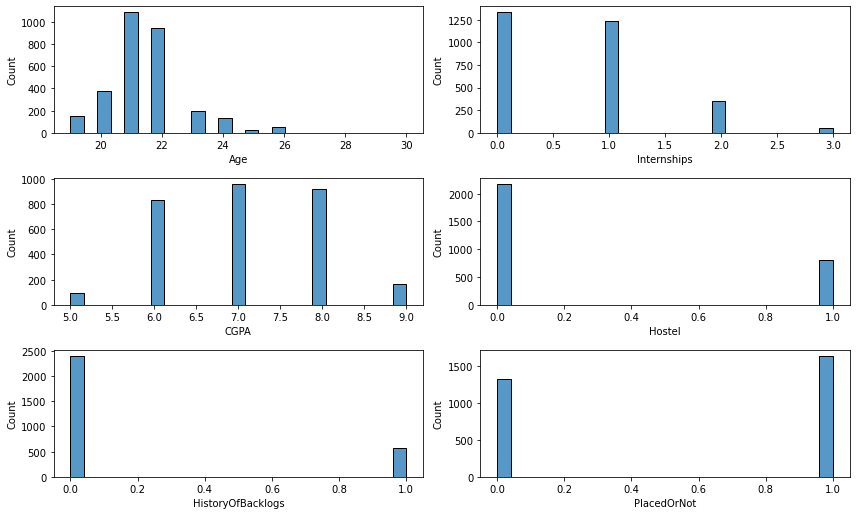

In [11]:
plt.figure(figsize=(12, 14))

for (i, col) in enumerate(discrete_cols,1):
    plt.subplot(6, 2, i)
    sns.histplot(df[col], bins=25)

plt.tight_layout()
plt.show()

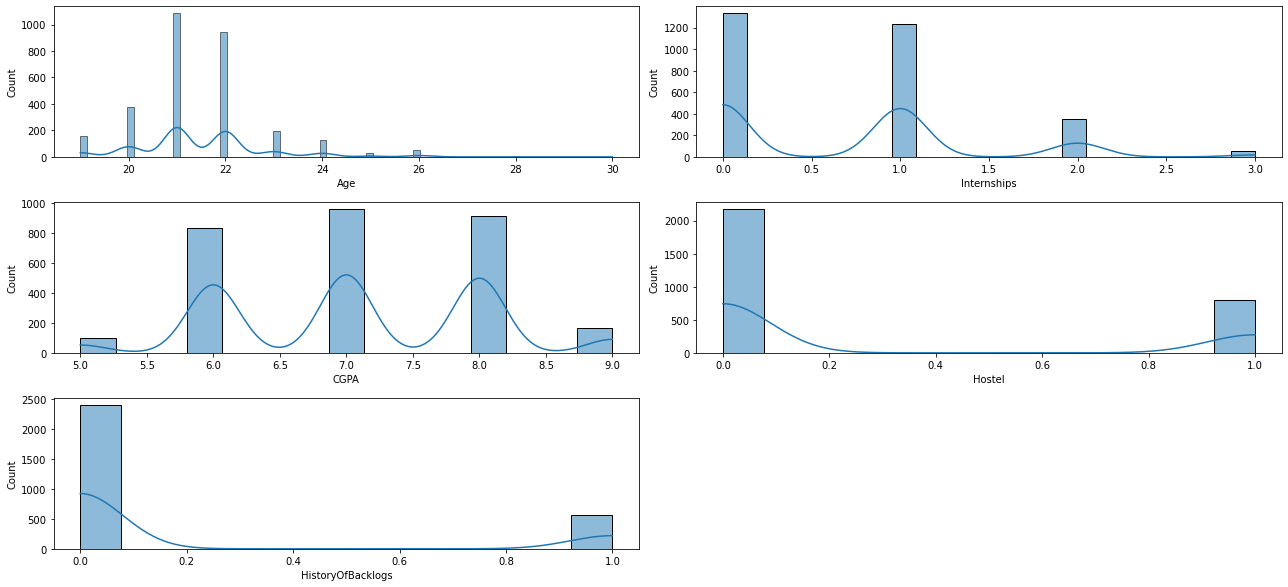

In [12]:
plt.figure(figsize=(18, 16))

for (i, col) in enumerate(numerical_cols[:-1],1):
    plt.subplot(6, 2, i)
    sns.histplot(x=df[col], kde=True)

plt.tight_layout()
plt.show()

### Categorical Variables

The dataset contains only two categorical features Gender and Stream.

<AxesSubplot:xlabel='count', ylabel='Gender'>

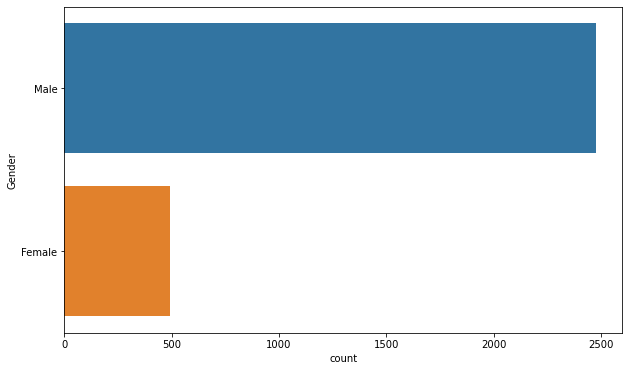

In [13]:
plt.figure(figsize=(10, 6))

sns.countplot(y = df['Gender'])

Here we can see that Number of male students are much much heigher than female students.

<AxesSubplot:xlabel='count', ylabel='Stream'>

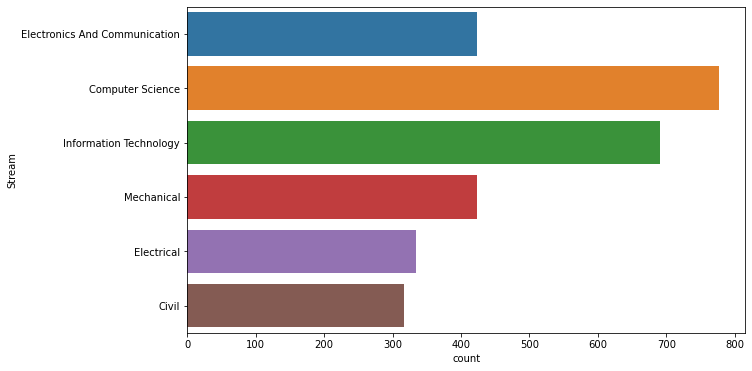

In [14]:
plt.figure(figsize=(10, 6))

sns.countplot(y = df['Stream'])

Here we can see that Computer Science stream is most popular among students

### outliers

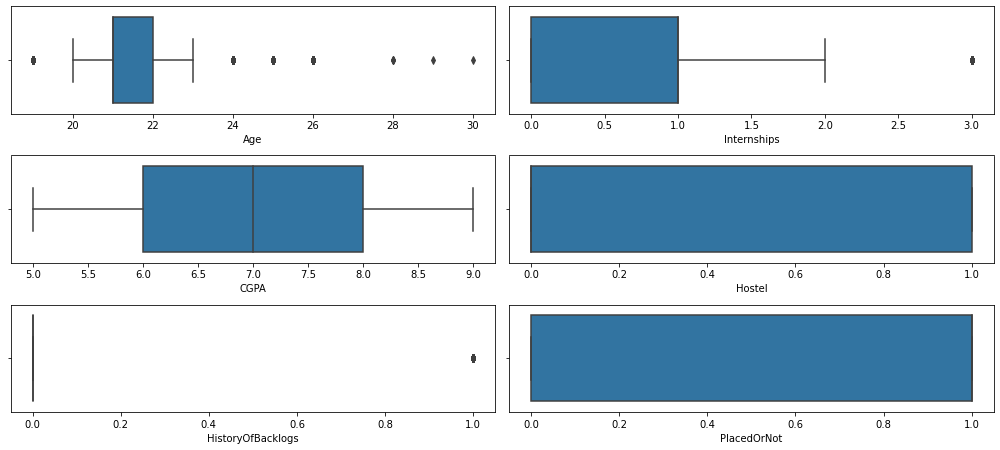

In [15]:
plt.figure(figsize=(14, 8))

count = 1
for col in numerical_cols:
    plt.subplot(4, 2, count)
    sns.boxplot(x=df[col])
    count += 1

plt.tight_layout()
plt.show()

### Hypothesis

1. Gender Vs placement


___
Here we will view the realtionship between gender and placement, whether being male or female can change their placement possibility or not.

In reality it should not show any kind of difference because of gender-eqality

<AxesSubplot:xlabel='Internships', ylabel='count'>

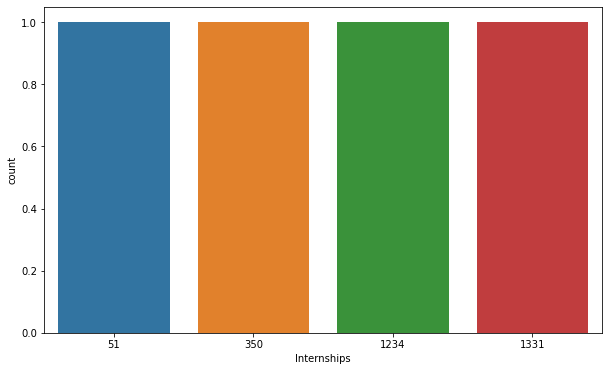

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Internships'].value_counts(),data=df)

### checking for multi-colinearity

In [33]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


### Train Test Split

before scaling values i must split it into train and test test to avoid data leakage.

#### performing categorical encoding(One-Hot encoding)

applying one-hot encoding on `'Gender','Stream'` columns

In [45]:
df = pd.get_dummies(df, columns=['Gender','Stream'], drop_first=True)
df.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Male,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22.0,1,8,1,1,1,1,0,0,1,0,0
1,21.0,0,7,1,1,1,0,1,0,0,0,0
2,22.0,1,6,0,0,1,0,0,0,0,1,0
3,21.0,0,8,0,1,1,1,0,0,0,1,0
4,22.0,0,8,1,0,1,1,0,0,0,0,1


In [46]:
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

In [47]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [48]:
print(f"X_train.shape={X_train.shape}")
print(f"X_test.shape={X_test.shape}")
print(f"y_train.shape={y_train.shape}")
print(f"y_test.shape={y_test.shape}")

X_train.shape=(1987, 11)
X_test.shape=(979, 11)
y_train.shape=(1987,)
y_test.shape=(979,)


## Model Building and Evaluation

In [49]:
xgb_cl = xgb.XGBClassifier(objective='binary:logistic', seed=0)

In [50]:
xgb_cl.fit(X_train, y_train, verbose=True, eval_metric='auc', eval_set=[(X_test, y_test)],
           early_stopping_rounds=20)

[0]	validation_0-auc:0.92366
[1]	validation_0-auc:0.92877
[2]	validation_0-auc:0.92633
[3]	validation_0-auc:0.92905
[4]	validation_0-auc:0.92909
[5]	validation_0-auc:0.93038
[6]	validation_0-auc:0.93234
[7]	validation_0-auc:0.93618
[8]	validation_0-auc:0.93760
[9]	validation_0-auc:0.93809
[10]	validation_0-auc:0.93824
[11]	validation_0-auc:0.93976
[12]	validation_0-auc:0.94042
[13]	validation_0-auc:0.94040
[14]	validation_0-auc:0.94120
[15]	validation_0-auc:0.94138
[16]	validation_0-auc:0.94169
[17]	validation_0-auc:0.94252
[18]	validation_0-auc:0.94245
[19]	validation_0-auc:0.94270
[20]	validation_0-auc:0.94232
[21]	validation_0-auc:0.94295
[22]	validation_0-auc:0.94276
[23]	validation_0-auc:0.94412
[24]	validation_0-auc:0.94419
[25]	validation_0-auc:0.94452
[26]	validation_0-auc:0.94486
[27]	validation_0-auc:0.94470
[28]	validation_0-auc:0.94471
[29]	validation_0-auc:0.94475
[30]	validation_0-auc:0.94442
[31]	validation_0-auc:0.94445
[32]	validation_0-auc:0.94459
[33]	validation_0-au

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
y_pred = xgb_cl.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       426
           1       0.96      0.85      0.90       553

    accuracy                           0.89       979
   macro avg       0.89      0.90      0.89       979
weighted avg       0.90      0.89      0.89       979



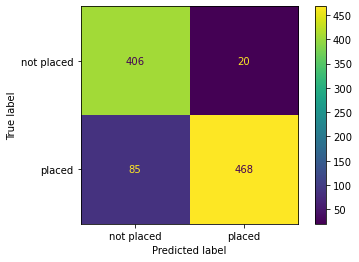

In [53]:
plot_confusion_matrix(xgb_cl, X_test, y_test, values_format='d',
                      display_labels=['not placed', 'placed'])

With default prarmeters XGBoost gave us 87% accuracy which is very good, and lets optimize.

## Optimizing XGBoost using GridSearchCV

In [54]:
# param_grid = {
#             'max_depth':[3, 4, 5],
#             'learning_rate':[0.01, 0.013, 0.15, 0.2],
#             'gamma':[0, 0.1, 0.25, 0.5],
#             'reg_lamda':[0, 0.25, 0.5, 1],
#             'scale_pos_weight':[1, 3, 5],
#             'subsample': [0.5, 0.75, 0.9]
# }

In [55]:
# kfold = KFold(10)

In [56]:
# optimal_params = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=0, subsample=0.9, colsample_bytree=0.5),
#                             param_grid=param_grid,
#                             verbose=0,
#                             n_jobs=-1,
#                             cv=5)

In [57]:
# optimal_params.get_params

In [58]:
# optimal_params.fit(X_train, y_train)
# print(optimal_params.best_score_)
# print(optimal_params.best_params_)
# print(optimal_params.best_estimator_)

In [59]:
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, reg_lamda=0, scale_pos_weight=1,
              seed=0, subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

xgb_cl.fit(X_train, y_train, verbose=True, eval_metric='auc', eval_set=[(X_test, y_test)],
           early_stopping_rounds=20)

[11:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "reg_lamda" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.86194
[1]	validation_0-auc:0.88097
[2]	validation_0-auc:0.92053
[3]	validation_0-auc:0.91979
[4]	validation_0-auc:0.92001
[5]	validation_0-auc:0.92303
[6]	validation_0-auc:0.92356
[7]	validation_0-auc:0.92338
[8]	validation_0-auc:0.92386
[9]	validation_0-auc:0.92498
[10]	validation_0-auc:0.92483
[11]	validation_0-auc:0.92514
[12]	validation_0-auc:0.92678
[13]	validation_0-auc:0.92570
[14]	validation_0-auc:0.92479
[15]	validation_0-auc:0.92487
[16]	validation_0-auc:0.92409
[17]	validation_0-auc:0.92414
[18]	validation_0-auc:0.92430
[19]	validation_0-auc:0.92415
[20]	validation_0-auc

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, reg_lamda=0, scale_pos_weight=1,
              seed=0, subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
y_pred = xgb_cl.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       426
           1       0.97      0.81      0.88       553

    accuracy                           0.88       979
   macro avg       0.88      0.89      0.88       979
weighted avg       0.90      0.88      0.88       979



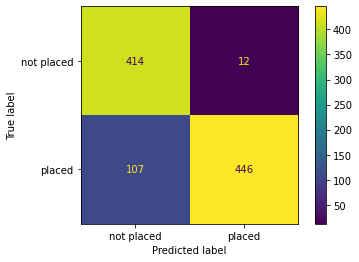

In [61]:
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_cl, X_test, y_test, values_format='d',
                      display_labels=['not placed', 'placed'])

So after using gridSearchCV our model did not perform any better.

## Saving Model

In [62]:
model_name = 'xgboost_clasifier.sav'
model = xgb_cl

In [63]:
joblib.dump(xgb_cl, fr'model/{model_name}')

['model/xgboost_clasifier.sav']

# Conslusion
successfully completed this project. Performed EDA, FE, applying models, optimizing models using gridSearchCV. 

If anyone want to contribute to this project, Just write a good description with your PR gladly i will merge.

Thank You